In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
pd.set_option("display.max_columns", None)
import numpy as np
from itertools import combinations

# Otros objetivos
# -----------------------------------------------------------------------
import sys
import os

# Ruta relativa desde notebooks/1-Preprocesing/ a src/
src_path = "../../src/"
sys.path.append(src_path)
import support_preprocesing as sp 
import pickle
%load_ext autoreload
%autoreload 2

# Preprocesado y modelado
# -----------------------------------------------------------------------
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler

# Configuración warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_pickle("../../results/cluster_sinencod_1.pkl")
df.head(2)

,Ship Mode,Segment,Market,Category,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,clusters_kmeans
185,First Class,Consumer,EU,Technology,1440.840,8,0.5,-1268.040,367.35,Critical,1
197,Second Class,Consumer,APAC,Office Supplies,1900.584,6,0.4,-348.516,360.04,High,1


# EDA

In [3]:
df.describe()

,Sales,Quantity,Discount,Profit,Shipping Cost
count,47096.000000,47096.000000,47096.000000,47096.000000,47096.000000
mean,170.945177,3.292212,0.145378,9.243388,17.321163
std,239.462800,2.097033,0.213870,92.185891,26.812174
min,0.836000,1.000000,0.000000,-1869.876000,0.000000
25%,29.610000,2.000000,0.000000,-0.024000,2.490000
50%,78.082000,3.000000,0.000000,8.370000,7.120000
75%,211.042500,4.000000,0.200000,30.322500,20.300000
max,2951.991000,14.000000,0.800000,321.900000,367.350000


In [4]:
sp.exploracion_basica_dataframe(df)

El número de datos es 47096 y el de columnas es 11

 ------------------------------- 

Los duplicados que tenemos en el conjunto de datos son: 0

 ------------------------------- 

Los unicos que tenemos en el conjunto de datos son:


,count,% unique
Profit,21890,46.48
Sales,20635,43.81
Shipping Cost,7884,16.74
Discount,26,0.06
Quantity,14,0.03
Ship Mode,4,0.01
Segment,3,0.01
Market,7,0.01
Category,3,0.01
Order Priority,4,0.01


Las columnas con más del 50% de valores unicos son:

 ------------------------------- 

Las columnas con solo 1 valor único son:
clusters_kmeans

 ------------------------------- 

Los nulos que tenemos en el conjunto de datos son:


,count,% nulos


Las columnas con más del 50% de valores nulos son:

 ------------------------------- 

Los tipos de las columnas son:


,tipo_dato
Ship Mode,object
Segment,object
Market,object
Category,object
Sales,float64
Quantity,int64
Discount,float64
Profit,float64
Shipping Cost,float64
Order Priority,object



 ------------------------------- 

Los valores que tenemos para las columnas categóricas son: 


,columna
0,Ship Mode
1,Segment
2,Market
3,Category
4,Order Priority
5,clusters_kmeans



 ------------------------------- 

Los valores que tenemos para las columnas numéricas son: 


,columna
0,Sales
1,Quantity
2,Discount
3,Profit
4,Shipping Cost



 ------------------------------- 

La columna SHIP MODE tiene las siguientes valore únicos:


,count,porcentaje (%)
Ship Mode,,
Standard Class,28853,61.264
Second Class,9415,19.991
First Class,6502,13.806
Same Day,2326,4.939



 ------------------------------- 

La columna SEGMENT tiene las siguientes valore únicos:


,count,porcentaje (%)
Segment,,
Consumer,24367,51.739
Corporate,14182,30.113
Home Office,8547,18.148



 ------------------------------- 

La columna MARKET tiene las siguientes valore únicos:


,count,porcentaje (%)
Market,,
APAC,9894,21.008
LATAM,9542,20.261
EU,9178,19.488
US,9043,19.201
EMEA,4753,10.092
Africa,4328,9.190
Canada,358,0.760



 ------------------------------- 

La columna CATEGORY tiene las siguientes valore únicos:


,count,porcentaje (%)
Category,,
Office Supplies,29558,62.761
Technology,8784,18.651
Furniture,8754,18.588



 ------------------------------- 

La columna ORDER PRIORITY tiene las siguientes valore únicos:


,count,porcentaje (%)
Order Priority,,
Medium,27506,58.404
High,14194,30.138
Critical,3115,6.614
Low,2281,4.843



 ------------------------------- 

La columna CLUSTERS_KMEANS tiene las siguientes valore únicos:


,count,porcentaje (%)
clusters_kmeans,,
1,47096,100.0



 ------------------------------- 

_______________________________________________________
Los valores que tenemos para las columnas numéricas son: 
La columna SALES tiene las siguientes valore únicos:


,count,porcentaje (%)
Sales,,
12.960,58,0.123
25.920,50,0.106
19.440,40,0.085
32.400,40,0.085
15.552,37,0.079
...,...,...
2.043,1,0.002
1.556,1,0.002
2.202,1,0.002



 ------------------------------- 

La columna QUANTITY tiene las siguientes valore únicos:


,count,porcentaje (%)
Quantity,,
2,12296,26.108
3,9166,19.462
1,8724,18.524
4,5806,12.328
5,4318,9.169
6,2619,5.561
7,1949,4.138
8,1057,2.244
9,701,1.488



 ------------------------------- 

La columna DISCOUNT tiene las siguientes valore únicos:


,count,porcentaje (%)
Discount,,
0.000,26578,56.434
0.200,4574,9.712
0.100,3629,7.706
0.400,3009,6.389
0.600,1913,4.062
0.700,1688,3.584
0.500,1539,3.268
0.470,691,1.467
0.170,662,1.406



 ------------------------------- 

La columna PROFIT tiene las siguientes valore únicos:


,count,porcentaje (%)
Profit,,
0.000,630,1.338
4.320,70,0.149
3.960,69,0.147
7.920,65,0.138
2.640,60,0.127
...,...,...
46.512,1,0.002
-993.195,1,0.002
-1023.030,1,0.002



 ------------------------------- 

La columna SHIPPING COST tiene las siguientes valore únicos:


,count,porcentaje (%)
Shipping Cost,,
1.26,74,0.157
0.71,72,0.153
1.36,71,0.151
0.35,70,0.149
0.86,70,0.149
...,...,...
278.75,1,0.002
283.36,1,0.002
284.19,1,0.002



 ------------------------------- 



A la vista de los datos procedemos a realizar el preprocesing

In [5]:
df.head(1)

,Ship Mode,Segment,Market,Category,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,clusters_kmeans
185,First Class,Consumer,EU,Technology,1440.84,8,0.5,-1268.04,367.35,Critical,1


In [6]:
df.head(1)

,Ship Mode,Segment,Market,Category,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,clusters_kmeans
185,First Class,Consumer,EU,Technology,1440.84,8,0.5,-1268.04,367.35,Critical,1


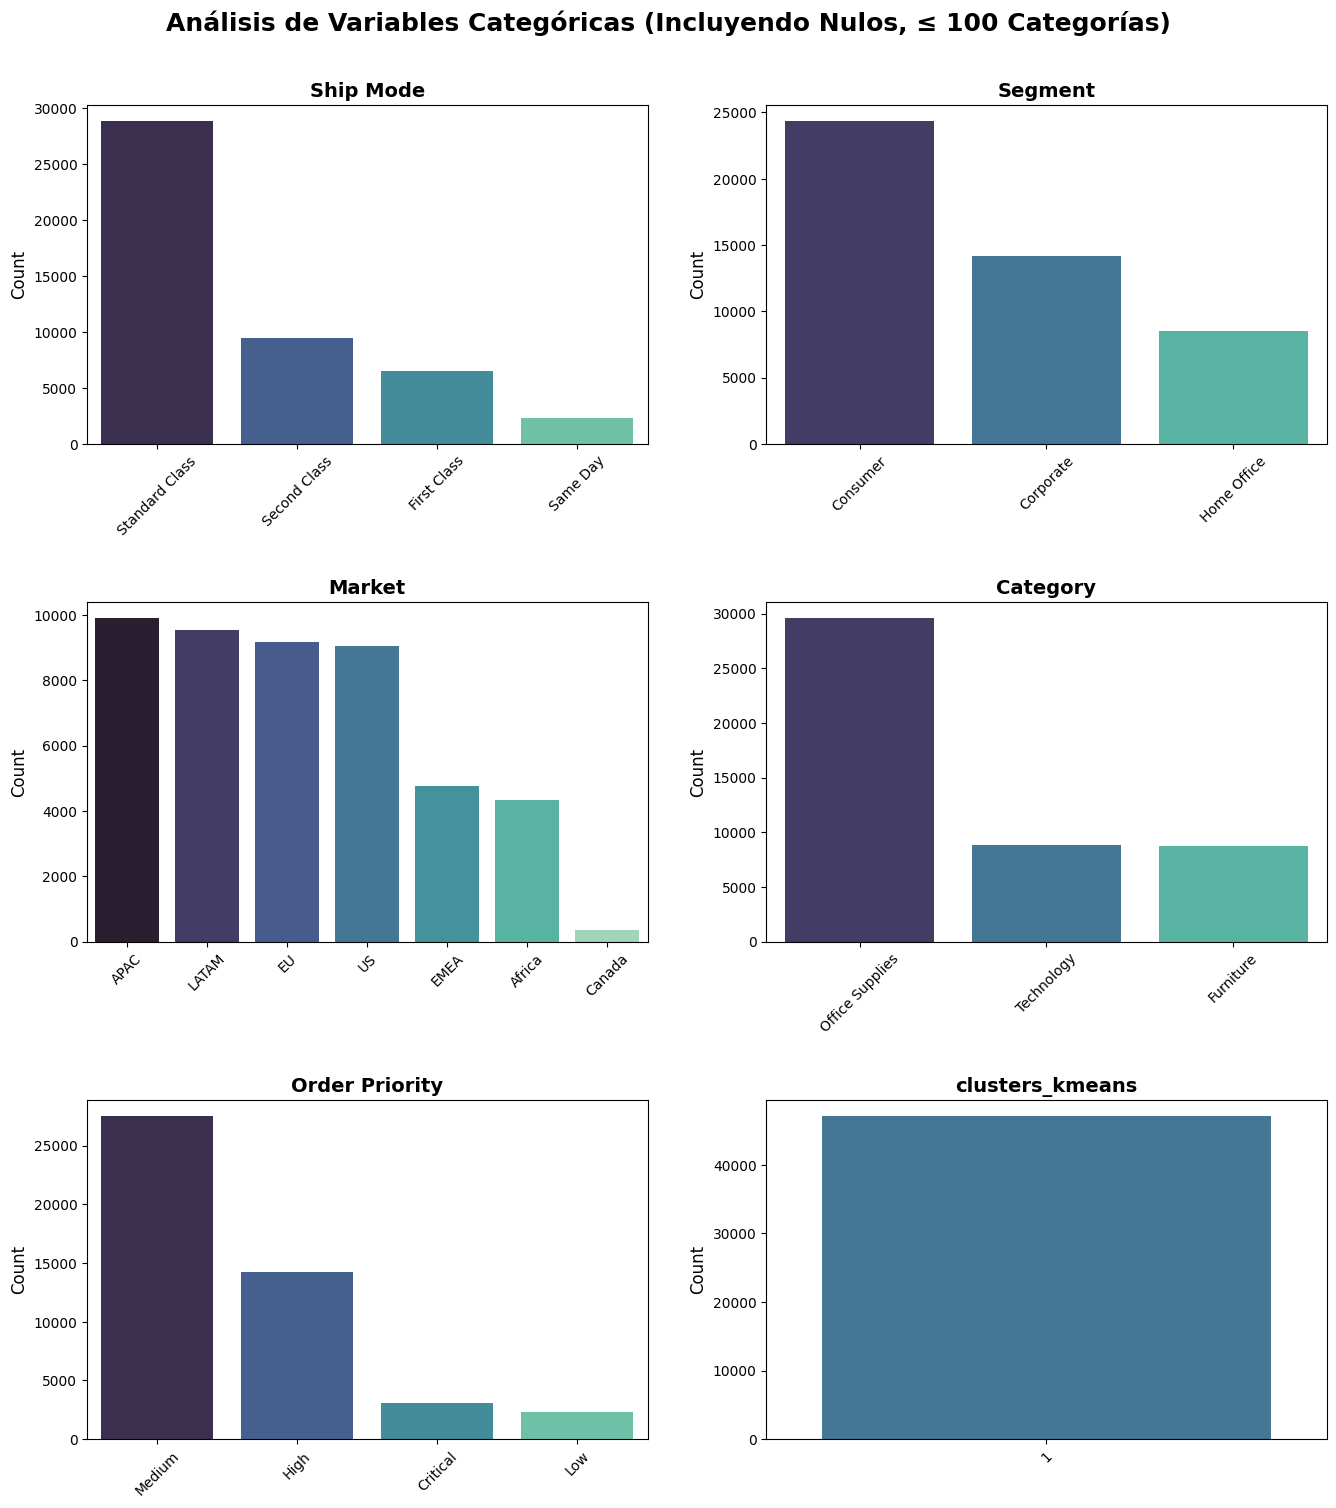

In [7]:
sp.plot_categoricas(df,max_categories=100) 

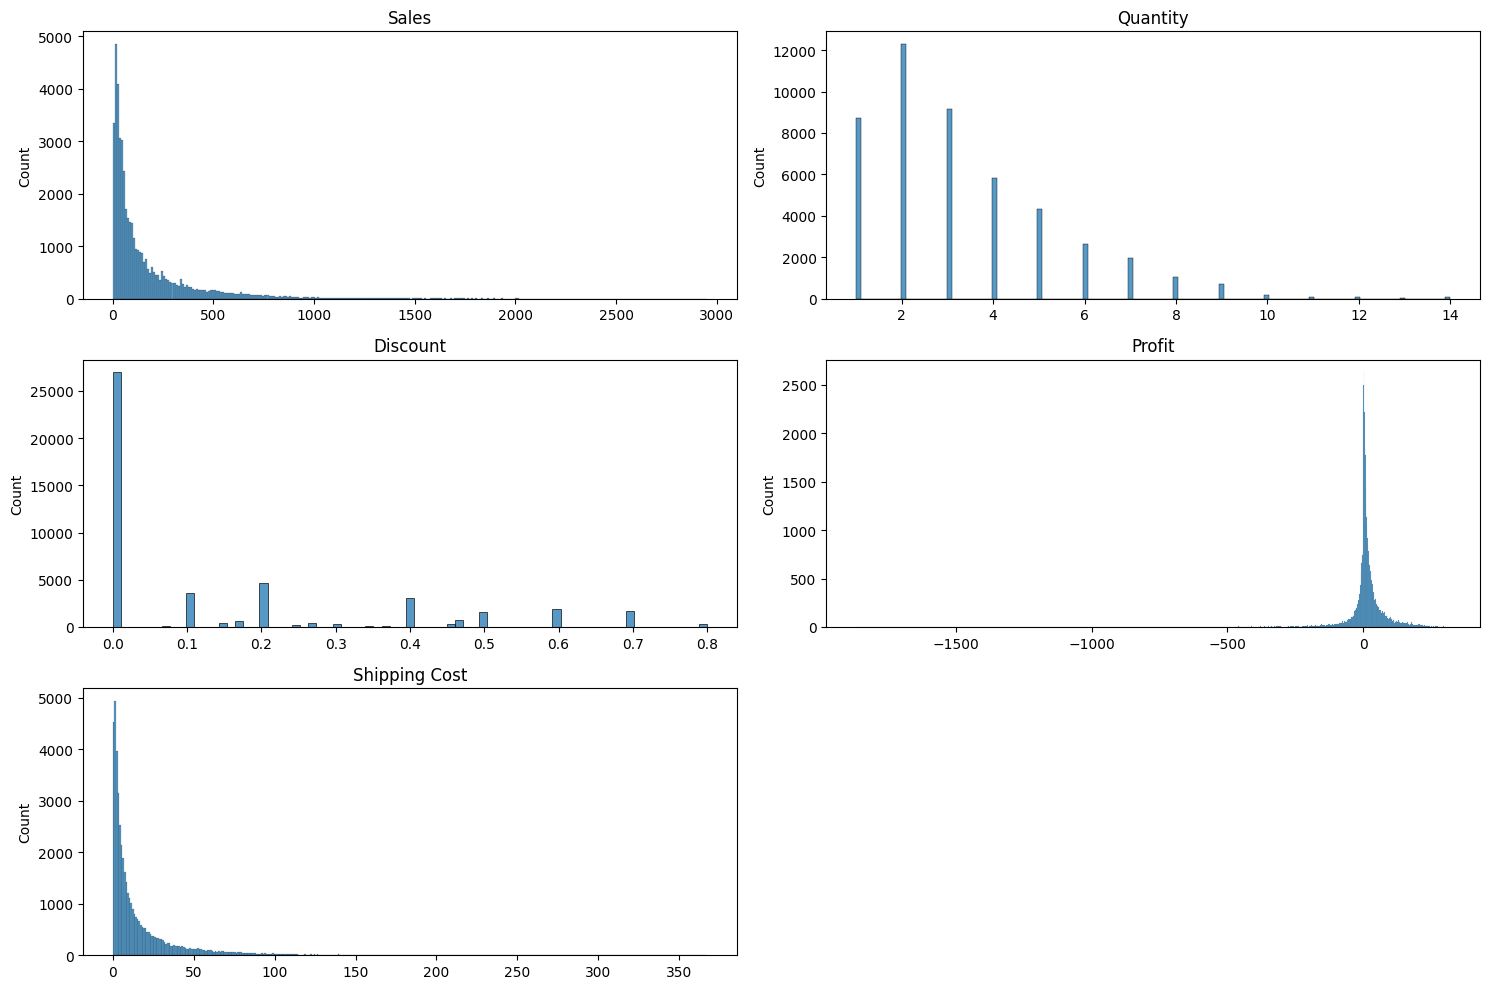

In [8]:
sp.plot_numericas(df)

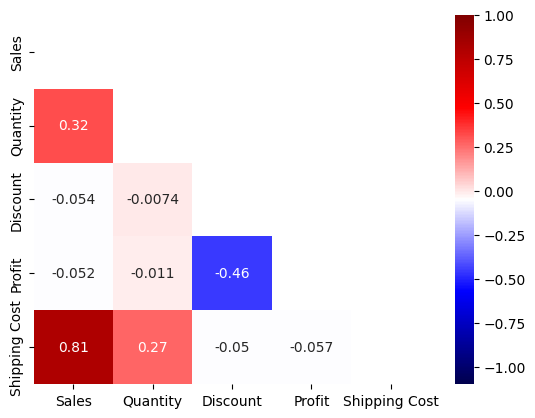

<Figure size 1000x1500 with 0 Axes>

In [9]:
sp.matriz_correlacion(df)

# Gestión de nulos

In [10]:
# Vemos la cantidad actual que tenemos de nan
print(df.isnull().sum())

Ship Mode          0
Segment            0
Market             0
Category           0
Sales              0
Quantity           0
Discount           0
Profit             0
Shipping Cost      0
Order Priority     0
clusters_kmeans    0
dtype: int64


In [11]:
# Vemos la cantidad total
df.isnull().sum().sum()

np.int64(0)

In [12]:
df.shape

(47096, 11)

# Gestion de Outiers

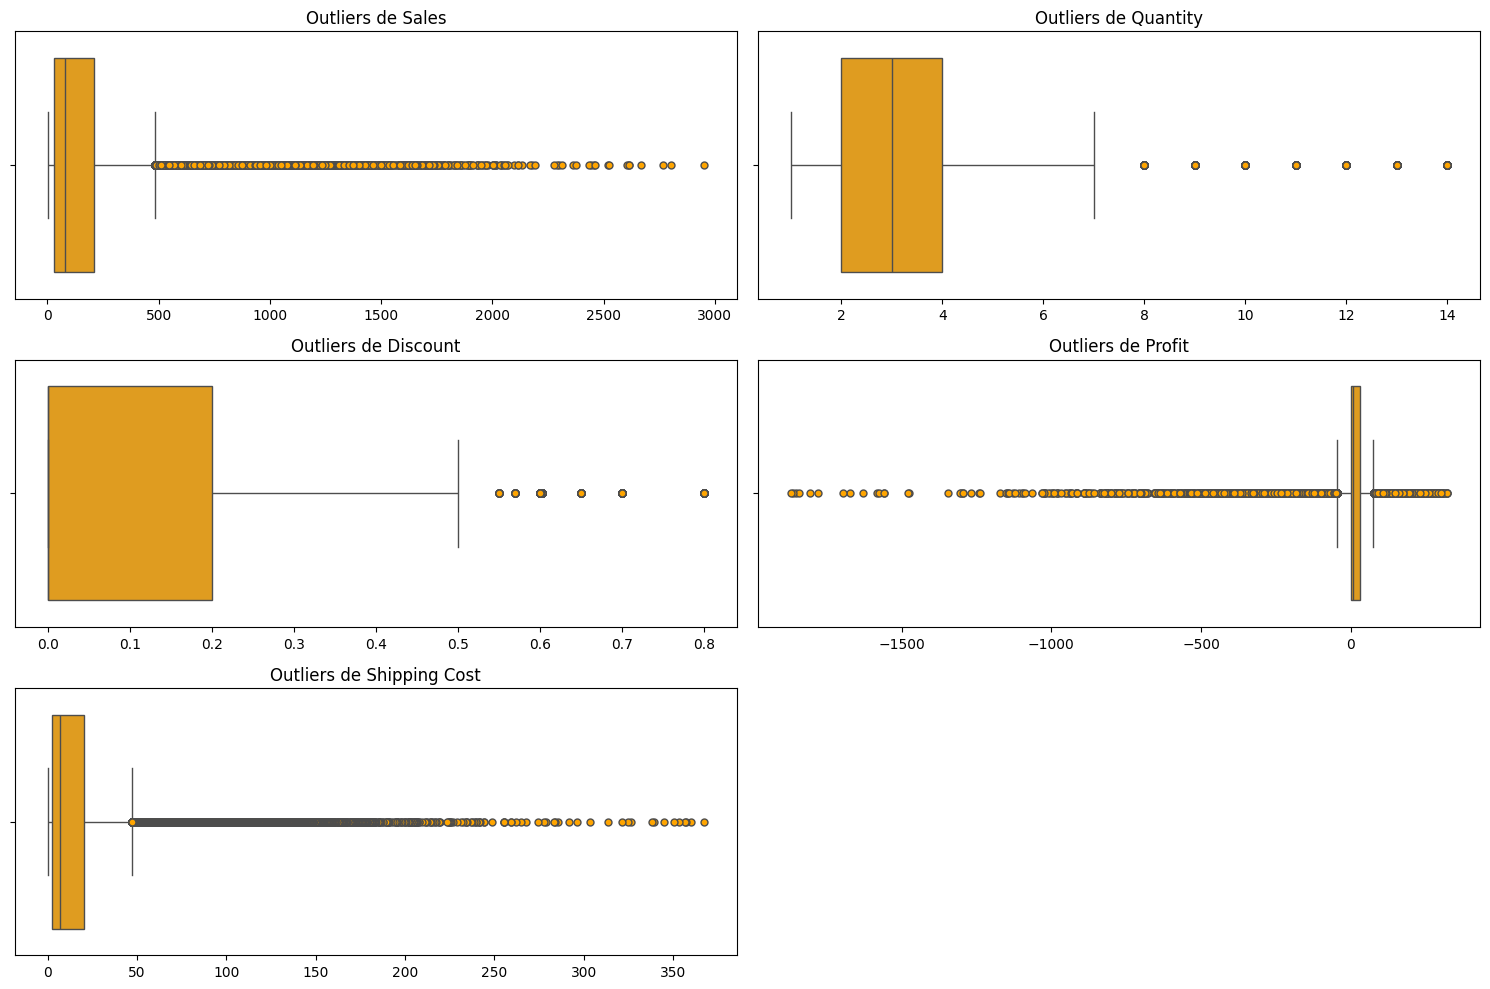

In [13]:
sp.detectar_outliers(df)

In [14]:
df.head(1)

,Ship Mode,Segment,Market,Category,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,clusters_kmeans
185,First Class,Consumer,EU,Technology,1440.84,8,0.5,-1268.04,367.35,Critical,1


In [15]:
col_numericas=df.select_dtypes(include=np.number).columns
lista_vecinos=[5, 10, 20, 50]
list_contaminacion = [0.01, 0.05, 0.1]

df_lof = df.copy()
df_lof = sp.gestion_nulos_lof(df_lof, col_numericas, lista_vecinos, list_contaminacion)

Aplicando LOF con diferentes parámetros: 100%|██████████| 12/12 [00:03<00:00,  3.14it/s]


In [16]:
df_lof.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,47096.0,170.945177,239.462800,0.836,29.610,78.082,211.0425,2951.991
Quantity,47096.0,3.292212,2.097033,1.000,2.000,3.000,4.0000,14.000
Discount,47096.0,0.145378,0.213870,0.000,0.000,0.000,0.2000,0.800
Profit,47096.0,9.243388,92.185891,-1869.876,-0.024,8.370,30.3225,321.900
Shipping Cost,47096.0,17.321163,26.812174,0.000,2.490,7.120,20.3000,367.350
outliers_lof_5_0.01,47096.0,0.979998,0.199008,-1.000,1.000,1.000,1.0000,1.000
outliers_lof_5_0.05,47096.0,0.899992,0.435912,-1.000,1.000,1.000,1.0000,1.000
outliers_lof_5_0.1,47096.0,0.799983,0.600029,-1.000,1.000,1.000,1.0000,1.000
outliers_lof_10_0.01,47096.0,0.979998,0.199008,-1.000,1.000,1.000,1.0000,1.000
outliers_lof_10_0.05,47096.0,0.899992,0.435912,-1.000,1.000,1.000,1.0000,1.000


In [17]:
col_numericas

Index(['Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost'], dtype='object')

In [18]:
combinaciones_variables = list(combinations(col_numericas, 2))
columnas_hue = df_lof.filter(like="outlier").columns

In [19]:
# sp.scatterplot_outliers(df_lof,combinaciones_variables,columnas_hue)

In [20]:
cantidad = 5
df_filtrado = df_lof[(df_lof == -1).sum(axis=1) > cantidad]
df_filtrado.shape

(1386, 23)

In [21]:
df_filtrado.head()

,Ship Mode,Segment,Market,Category,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,clusters_kmeans,outliers_lof_5_0.01,outliers_lof_5_0.05,outliers_lof_5_0.1,outliers_lof_10_0.01,outliers_lof_10_0.05,outliers_lof_10_0.1,outliers_lof_20_0.01,outliers_lof_20_0.05,outliers_lof_20_0.1,outliers_lof_50_0.01,outliers_lof_50_0.05,outliers_lof_50_0.1
185,First Class,Consumer,EU,Technology,1440.840,8,0.50,-1268.040,367.35,Critical,1,-1,-1,-1,1,1,-1,1,1,1,1,-1,-1
214,First Class,Home Office,EU,Furniture,2442.069,7,0.10,-244.251,353.57,High,1,1,1,1,1,1,1,-1,-1,-1,-1,-1,-1
235,Standard Class,Home Office,US,Furniture,2065.320,12,0.40,-619.596,344.98,High,1,1,-1,-1,1,1,-1,1,-1,-1,1,-1,-1
244,Second Class,Consumer,EU,Furniture,2364.102,4,0.35,-218.298,338.10,Medium,1,1,1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1
310,Second Class,Consumer,APAC,Furniture,1136.664,4,0.40,-189.456,313.52,Critical,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [22]:
df_final=df.drop(index = df_filtrado.index).reset_index(drop=True)

In [23]:
df.shape

(47096, 11)

In [24]:
# df final para crear modelos
df_final.shape

(45710, 11)

In [25]:
df_final.head()

,Ship Mode,Segment,Market,Category,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,clusters_kmeans
0,Second Class,Consumer,APAC,Office Supplies,1900.584,6,0.40,-348.516,360.04,High,1
1,Same Day,Home Office,APAC,Furniture,1582.200,6,0.40,-870.300,357.21,Critical,1
2,Second Class,Corporate,US,Office Supplies,1801.632,6,0.20,-337.806,356.88,High,1
3,Second Class,Home Office,APAC,Furniture,1725.750,5,0.25,-483.300,350.68,Critical,1
4,First Class,Consumer,APAC,Furniture,1809.255,5,0.30,-258.495,339.47,High,1


In [26]:
df_final=df_final.drop_duplicates()

In [27]:
df_final.describe()

,Sales,Quantity,Discount,Profit,Shipping Cost
count,45710.000000,45710.000000,45710.000000,45710.000000,45710.000000
mean,170.502983,3.251214,0.143880,9.833987,17.069200
std,234.164115,2.056043,0.212989,89.802748,25.647707
min,0.836000,1.000000,0.000000,-1869.876000,0.000000
25%,29.962500,2.000000,0.000000,0.000000,2.530000
50%,78.840000,3.000000,0.000000,8.570100,7.200000
75%,212.100000,4.000000,0.200000,30.720000,20.300000
max,2667.537000,14.000000,0.800000,318.640320,360.040000


In [28]:
df_final.dtypes

Ship Mode           object
Segment             object
Market              object
Category            object
Sales              float64
Quantity             int64
Discount           float64
Profit             float64
Shipping Cost      float64
Order Priority      object
clusters_kmeans     object
dtype: object